In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pystrata

import json

from pystrata.motion import TimeSeriesMotion
from pystrata.site import Profile
# from PIL import Image
# # from fileinput import filename
# from fileloaders import time_accel_txt_to_pystrata_motion
# import pyexcel

from dataclasses import dataclass
from dataclasses_json import dataclass_json

# from lampa.input import LCalculatorType
from lampa.input import LPyStrataInput
from lampa.input import LTimeSeriesMotion
from lampa.input import LSoilType, LDarendeliSoilType
from lampa.input import LLayer

### Διέγερση

In [4]:
ltsm = LTimeSeriesMotion.from_txt('Kocaeli.txt')
# ltsm = LTimeSeriesMotion.from_excel('Kocaeli.xlsx')
# ltsm = LTimeSeriesMotion.from_csv('Kocaeli.csv')
ltsm

LTimeSeriesMotion(description='', time_step=0.005, accels=array([5.890857e-06, 6.174527e-06, 6.471501e-06, ..., 1.994855e-03,
       2.009481e-03, 2.024089e-03]))

### Εδαφικές στρώσεις

In [17]:
layers = list[LLayer]()

layers.append(LLayer(layer_type='SoilType',
                  layer_properties=LSoilType(name='Loose Sand', unit_wt=16.0, damping=0.05),
                  thickness=5,
                  shear_vel=140))

layers.append(LLayer(layer_type='SoilType',
                  layer_properties=LSoilType(name='Clay', unit_wt=18.0, damping=0.05),
                  thickness=15,
                  shear_vel=250))

layers.append(LLayer(layer_type='SoilType',
                  layer_properties=LSoilType(name='Dense Sand', unit_wt=20.0, damping=0.05),
                  thickness=30,
                  shear_vel=450))

layers.append(LLayer(layer_type='SoilType',
                  layer_properties=LSoilType(name='Rock', unit_wt=23.0, damping=0.02),
                  thickness=0,
                  shear_vel=1200))

# layers.append(LLayer(layer_type='DarendeliSoilType',
#                   layer_properties=LDarendeliSoilType(name='SandDaredeli', unit_wt=16.0),
#                   thickness=5,
#                   shear_vel=140))



In [18]:
lpsi = LPyStrataInput(name='input_test',
                      calculator_type = 'linear',  # LCalculatorType.EQUIVALENT_LINEAR_CALCULATOR,
                      time_series_motion=ltsm,
                      layers=layers)

In [19]:
lpsi

LPyStrataInput(name='input_test', calculator_type='linear', time_series_motion=LTimeSeriesMotion(description='', time_step=0.005, accels=array([5.890857e-06, 6.174527e-06, 6.471501e-06, ..., 1.994855e-03,
       2.009481e-03, 2.024089e-03])), layers=[LLayer(layer_type='SoilType', layer_properties=LSoilType(name='Loose Sand', unit_wt=16.0, damping=0.05), thickness=5, shear_vel=140), LLayer(layer_type='SoilType', layer_properties=LSoilType(name='Clay', unit_wt=18.0, damping=0.05), thickness=15, shear_vel=250), LLayer(layer_type='SoilType', layer_properties=LSoilType(name='Dense Sand', unit_wt=20.0, damping=0.05), thickness=30, shear_vel=450), LLayer(layer_type='SoilType', layer_properties=LSoilType(name='Rock', unit_wt=23.0, damping=0.02), thickness=0, shear_vel=1200)])

In [20]:
calc = lpsi.do_the_analysis()

In [8]:
print()

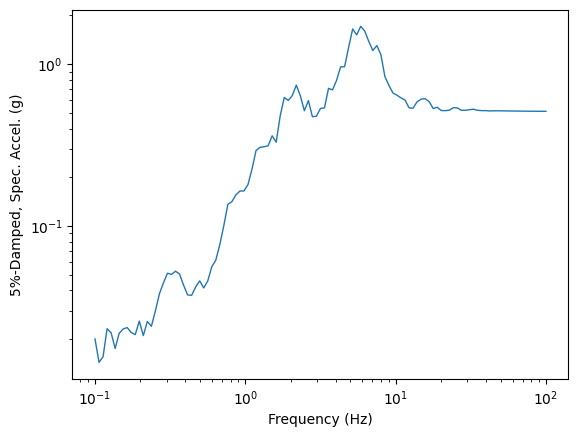

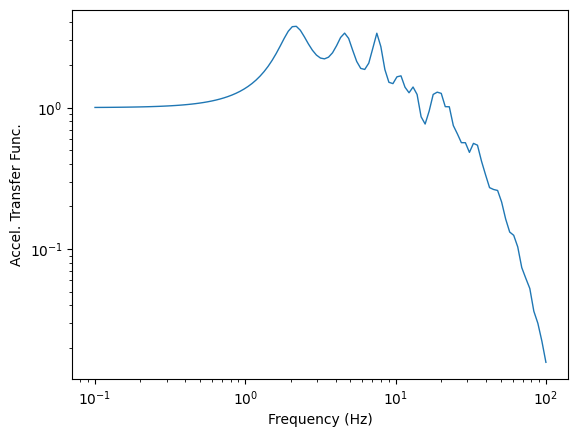

In [21]:
freqs = np.logspace(-1, 2, num=113)

outputs = pystrata.output.OutputCollection(
    [
        pystrata.output.ResponseSpectrumOutput(
            # Frequency
            freqs,
            # Location of the output
            pystrata.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ), 
        pystrata.output.AccelTransferFunctionOutput(
            # Frequency
            freqs,
            # Location in (denominator),
            pystrata.output.OutputLocation("outcrop", index=-1),
            # Location out (numerator)
            pystrata.output.OutputLocation("outcrop", index=0),
        ),
       
    ]
)


outputs(calc)
for o in outputs:
    o.plot(style="indiv")

True

In [54]:
lst1 = LSoilType(name='Loose Sand', unit_wt=16.0, damping=0.05)
lst2 = LSoilType(name='Clay', unit_wt=18.0, damping=0.05)
lst3 = LSoilType(name='Dense Sand', unit_wt=20.0, damping=0.05)
lst4 = LSoilType(name='Rock', unit_wt=23.0, damping=0.02)

In [55]:
lli1 = LLayer(layer_type='SoilType',
                  layer_properties=lst1,
                  thickness=5,
                  shear_vel=140)

lli2 = LLayer(layer_type='SoilType',
                  layer_properties=lst2,
                  thickness=15,
                  shear_vel=250)

lli3 = LLayer(layer_type='SoilType',
                  layer_properties=lst3,
                  thickness=30,
                  shear_vel=450)

lli4 = LLayer(layer_type='SoilType',
                  layer_properties=lst4,
                  thickness=0,
                  shear_vel=1200)

type(lli1)

lampa.input.LLayer

In [58]:
psi = LPyStrataInput(name = 'test1',
                    calculator_type='Elastic',
                    time_series_motion=ltsm,
                    layers=[lli1, lli2, lli3, lli4])

In [ ]:
# psi.to_json()


In [59]:
type(psi.to_json())

str

In [ ]:
# with open("sample.json", "w") as outfile:
#     outfile.write(psi.to_json())
    
# # print(json.dumps(psi.to_json(), sort_keys=True, indent=4))

In [ ]:
# with open('sample.json') as data_file:
#     data_loaded = json.load(data_file)
    
# # data_loaded

In [ ]:
# psi_load = PyStrataInput.from_dict(data_loaded)
# psi_load.layers

In [60]:
profile = pystrata.site.Profile([layer.to_pystrata for layer in psi.layers]).auto_discretize()

<AxesSubplot: xlabel='Initial $V_s$ (m/s)', ylabel='Depth (m)'>

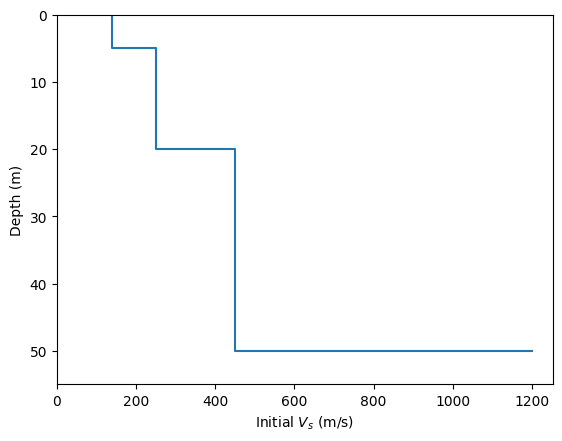

In [61]:
profile.plot("initial_shear_vel")

<AxesSubplot: xlabel='Initial $V_s$ (m/s)', ylabel='Depth (m)'>

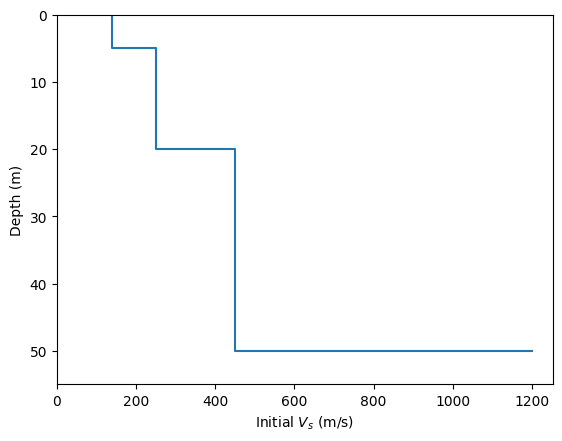

In [62]:
profile2 = psi.to_pystrata_profile
profile2.plot("initial_shear_vel")

In [63]:
freqs = np.logspace(-1, 2, num=113)

outputs = pystrata.output.OutputCollection(
    [
        pystrata.output.ResponseSpectrumOutput(
            # Frequency
            freqs,
            # Location of the output
            pystrata.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ), 
        pystrata.output.AccelTransferFunctionOutput(
            # Frequency
            freqs,
            # Location in (denominator),
            pystrata.output.OutputLocation("outcrop", index=-1),
            # Location out (numerator)
            pystrata.output.OutputLocation("outcrop", index=0),
        ),
       
    ]
)

In [64]:
calc = pystrata.propagation.LinearElasticCalculator()
calc(psi.time_series_motion.to_pystrata, profile, profile.location("outcrop", index=-1))

AttributeError: module 'pystrata.motion' has no attribute 'LTimeSeriesMotion'

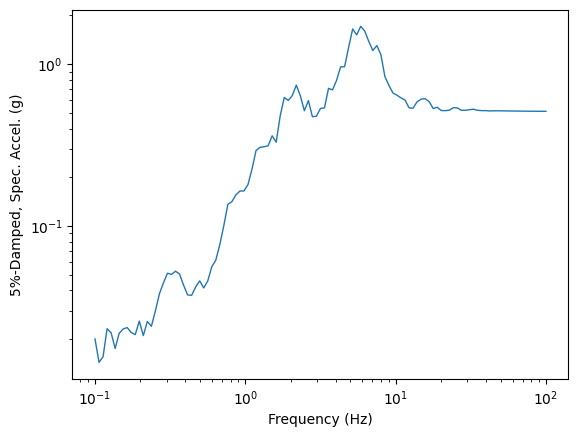

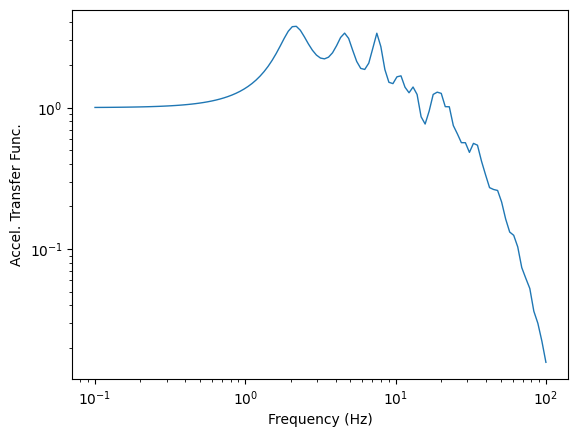

In [17]:
outputs(calc)
for o in outputs:
    o.plot(style="indiv")

In [19]:
ldsti1 = DarendeliSoilType(name='SandDaredeli', unit_wt=16.0)
ldsti1

DarendeliSoilType(name='SandDaredeli', unit_wt=16.0, plas_index=0.0, ocr=1.0, stress_mean=101.3, freq=1.0, num_cycles=10.0)

In [22]:
lli1 = Layer(layer_type='SoilType',
                  layer_properties=lst1,
                  thickness=5,
                  shear_vel=140)

In [23]:
lli1.to_json()

'{"layer_type": "SoilType", "layer_properties": {"name": "Loose Sand", "unit_wt": 16.0, "damping": 0.05}, "thickness": 5, "shear_vel": 140}'

In [24]:
lli2 = Layer(layer_type='DarendeliSoilType',
                  layer_properties=ldsti1,
                  thickness=5,
                  shear_vel=140)
lli2

Layer(layer_type='DarendeliSoilType', layer_properties=DarendeliSoilType(name='SandDaredeli', unit_wt=16.0, plas_index=0.0, ocr=1.0, stress_mean=101.3, freq=1.0, num_cycles=10.0), thickness=5, shear_vel=140)

In [26]:
psi = PyStrataInput(name = 'test1',
                    calculator_type='Elastic',
                    time_series_motion=lts,
                   layers=[lli1, lli2])

In [27]:
test_psi_json = psi.to_json()

In [28]:
psi2 = psi.from_json(test_psi_json)

In [29]:
psi2.layers

[Layer(layer_type='SoilType', layer_properties={'name': 'Loose Sand', 'unit_wt': 16.0, 'damping': 0.05}, thickness=5, shear_vel=140),
 Layer(layer_type='DarendeliSoilType', layer_properties={'name': 'SandDaredeli', 'unit_wt': 16.0, 'plas_index': 0.0, 'ocr': 1.0, 'stress_mean': 101.3, 'freq': 1.0, 'num_cycles': 10.0}, thickness=5, shear_vel=140)]

In [ ]:
ini_file = r'ini.json'
with open(ini_file, 'r') as f:
    input_data = json.load(f)

In [ ]:
input_data

In [ ]:
ts = time_accel_txt_to_pystrata_motion('Kocaeli.txt')

In [ ]:
ts.accels

In [ ]:
input_data['accel_file']

In [ ]:
# input_data['accel']['time'] : ts.accels

In [ ]:
input_data

In [ ]:
# data = {
#     'employees' : [
#         {
#             'name' : 'John Doe',
#             'department' : 'Marketing',
#             'place' : 'Remote'
#         },
#         {
#             'name' : 'Jane Doe',
#             'department' : 'Software Engineering',
#             'place' : 'Remote'
#         },
#         {
#             'name' : 'Don Joe',
#             'department' : 'Software Engineering',
#             'place' : 'Office'
#         }
#     ]
#     , 'blabla': {'x':4, 'y':5}
# }

In [ ]:
# data['blabla']['rrr'] = '3'
# data['blabla']['r44'] = '5'
# data['tt'] = 23

In [ ]:
# data

In [ ]:
# my_dict = {"username": "XYZ", "email": "xyz@gmail.com", "location":"Mumbai"}

# my_dict['name']='Nick'

# print(my_dict)

In [ ]:
# from dataclasses import dataclass

# @dataclass
# class Person:
#     name: str

In [ ]:
# p1 = Person(name='John')

In [ ]:
# p1

In [ ]:
# type(p1)

In [ ]:
# ddd = p1.__dict__
# ddd

In [ ]:
# @dataclass_json
# @dataclass
# class Person:
#     name: str


# person = Person(name='lidatong')
# person.to_json()  # '{"name": "lidatong"}' <- this is a string
# person.to_dict()  # {'name': 'lidatong'} <- this is a dict
# Person.from_json('{"name": "lidatong"}')  # Person(1)
# Person.from_dict({'name': 'lidatong'})  # Person(1)

In [ ]:
# person

In [ ]:
# person.to_json()

In [ ]:
# person.to_dict() 

In [ ]:
@dataclass_json
@dataclass
class PyStrataInput:
    name: str
    time_series_motion: dict[str, np.array]

In [ ]:
psi = PyStrataInput(name = 'test1',
                    time_series_motion={'times': ts.times, 'accels': ts.accels})

In [ ]:
jjj = psi.to_json()
# jjj

In [ ]:
psi2 = PyStrataInput.from_json(jjj)

In [ ]:
from lampa.input import Input



In [ ]:
list_layers = []

list_layers.append(pystrata.site.Layer(
            pystrata.site.DarendeliSoilType(16.0, plas_index=0, ocr=1, stress_mean=40),
            5,
            140,
        ))

list_layers.append(pystrata.site.Layer(
            pystrata.site.DarendeliSoilType(18.0, plas_index=25, ocr=1, stress_mean=215),
            15,
            250,
        ))

list_layers.append(pystrata.site.Layer(
            pystrata.site.DarendeliSoilType(20.0, plas_index=0, ocr=1, stress_mean=650),
            30,
            450,
        ))

list_layers.append(pystrata.site.Layer(pystrata.site.SoilType("Rock", 23.0, None, 0.02), 0, 1200))




In [ ]:
# iii = Input(time_series_motion=ts,
#            site_layers=list_layers,
#            calculator=pystrata.propagation.EquivalentLinearCalculator())

In [ ]:
# calc = iii.do_the_calcs()

In [ ]:
from lampa.input import PyStrataInput as pppp

In [ ]:
psi3 = pppp.from_json(jjj)

In [ ]:
psi3
